### Load R packages for importing and data visualization

In [154]:
library("tidyverse")
library("readxl")
library("stringr")
library("ggplot2")
library("dplyr")

In [155]:
rawgrowth <- read_excel("/Users/jasminereighard/Downloads/finalproject_rawalgaegrowth.xlsx")

## 1. Link to a description of the variables in the dataset below
### Includes how this data is used within the domain and the number of observations
[Link here](https://docs.google.com/document/d/10wJUzD6_f__jpcLPoO_58aJF5tneE4EOSoO9PGh1oQA/edit?usp=sharing)

## Data wrangling

#### Data is connected by commas and need to be deliminated into their own cells

In [156]:
rawgrowth[c('Date', 'ID', 'Species', 'Weight difference (g)', 'Run','Lanai side', 'Treatment' ,'Temperature (C)', 'Initial weight (g)', 'Final weight (g)','Plant ID', 'RLC order', 'Lunar phase')] <- str_split_fixed(rawgrowth$'date,ID,Species,weight difference,run,lanai side,treatment,temperature,Initial weight,final weight,plant ID,RLC order, lunar phase', ',', 13)

#### Remove column with multiple variables

In [157]:
rawgrowth$'date,ID,Species,weight difference,run,lanai side,treatment,temperature,Initial weight,final weight,plant ID,RLC order, lunar phase' <- NULL

In [158]:
head(rawgrowth)

Date,ID,Species,Weight difference (g),Run,Lanai side,Treatment,Temperature (C),Initial weight (g),Final weight (g),Plant ID,RLC order,Lunar phase
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
9/28/21,Hm1-1,Hm,0.0466,1,ewa,1,30 C,0.2879,0.3345,1,6,IV
9/28/21,Hm1-2,Hm,0.1107,1,ewa,2,30 C,0.2773,0.388,1,6,IV
9/28/21,Hm1-3,Hm,0.0968,1,ewa,3,30 C,0.2848,0.3816,1,6,IV
9/28/21,Hm1-4,Hm,0.08,1,ewa,4,30 C,0.2477,0.3277,1,6,IV
9/28/21,Ul1-1,Ul,-0.0287,1,ewa,1,30 C,0.2705,0.2418,1,6,IV
9/28/21,Ul1-2,Ul,-0.0745,1,ewa,2,30 C,0.2595,0.185,1,6,IV


#### Remove unnecessary variable for data analysis

In [159]:
rawgrowth$Date <- NULL

In [160]:
rawgrowth$ID <- NULL

In [161]:
rawgrowth$Run <- NULL

In [162]:
rawgrowth$'Plant ID' <- NULL

In [163]:
rawgrowth$'Lanai side' <- NULL

In [164]:
rawgrowth$'RLC order' <- NULL

In [165]:
head(rawgrowth)

Species,Weight difference (g),Treatment,Temperature (C),Initial weight (g),Final weight (g),Lunar phase
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Hm,0.0466,1,30 C,0.2879,0.3345,IV
Hm,0.1107,2,30 C,0.2773,0.388,IV
Hm,0.0968,3,30 C,0.2848,0.3816,IV
Hm,0.08,4,30 C,0.2477,0.3277,IV
Ul,-0.0287,1,30 C,0.2705,0.2418,IV
Ul,-0.0745,2,30 C,0.2595,0.185,IV


#### Reorder table

In [166]:
growthdata <- rawgrowth[,c("Species", "Treatment", "Temperature (C)", "Initial weight (g)",
                           "Final weight (g)", "Weight difference (g)", "Lunar phase")]

In [167]:
head(growthdata)

Species,Treatment,Temperature (C),Initial weight (g),Final weight (g),Weight difference (g),Lunar phase
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Hm,1,30 C,0.2879,0.3345,0.0466,IV
Hm,2,30 C,0.2773,0.388,0.1107,IV
Hm,3,30 C,0.2848,0.3816,0.0968,IV
Hm,4,30 C,0.2477,0.3277,0.08,IV
Ul,1,30 C,0.2705,0.2418,-0.0287,IV
Ul,2,30 C,0.2595,0.185,-0.0745,IV


#### Make a new column that keeps only the numerical values (effectively removes the C in temperatures for consistency)

In [168]:
growthdata$'Temperature (C)' <- as.factor(substr(growthdata$'Temperature (C)', 1, 2))

In [169]:
head(growthdata)

Species,Treatment,Temperature (C),Initial weight (g),Final weight (g),Weight difference (g),Lunar phase
<chr>,<chr>,<fct>,<chr>,<chr>,<chr>,<chr>
Hm,1,30,0.2879,0.3345,0.0466,IV
Hm,2,30,0.2773,0.388,0.1107,IV
Hm,3,30,0.2848,0.3816,0.0968,IV
Hm,4,30,0.2477,0.3277,0.08,IV
Ul,1,30,0.2705,0.2418,-0.0287,IV
Ul,2,30,0.2595,0.185,-0.0745,IV


#### Convert treatment to factors from characters

In [170]:
growthdata$Treatment <- as.factor(as.character(growthdata$Treatment))

#### Convert lunar phase to factors from characters

In [171]:
growthdata$'Lunar phase' <- as.factor(as.character(growthdata$'Lunar phase'))

#### Convert Initial and Final Weight to factors from characters

In [172]:
growthdata$'Initial weight (g)' <- as.double(as.character(growthdata$'Initial weight (g)'))
growthdata$'Final weight (g)' <- as.double(as.character(growthdata$'Final weight (g)'))

#### Calculate Weight Difference column to fill in for missing points

In [173]:
growthdata$'Weight Differences (g)' <- growthdata$'Final weight (g)' - growthdata$'Initial weight (g)'

In [174]:
growthdata$'Weight difference (g)' <- NULL

#### Assign species names from the abbreviations

In [175]:
growthdata$'Species'[growthdata$Species == "Hm"] <- "Hypnea"
growthdata$'Species'[growthdata$Species == "Ul"] <- "Ulva"

#### Make a new column for percent growth (divide initial from weight difference and multiply by 100)

In [176]:
growthdata$'Percent Growth (%)' <- ((growthdata$'Weight Differences (g)' / growthdata$'Initial weight (g)') * 100) 

In [177]:
head(growthdata)

Species,Treatment,Temperature (C),Initial weight (g),Final weight (g),Lunar phase,Weight Differences (g),Percent Growth (%)
<chr>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
Hypnea,1,30,0.2879,0.3345,IV,0.0466,16.18618
Hypnea,2,30,0.2773,0.3880,IV,0.1107,39.92066
Hypnea,3,30,0.2848,0.3816,IV,0.0968,33.98876
Hypnea,4,30,0.2477,0.3277,IV,0.0800,32.29713
Ulva,1,30,0.2705,0.2418,IV,-0.0287,-10.60998
Ulva,2,30,0.2595,0.1850,IV,-0.0745,-28.70906


#### Convert Species to factors from characters

In [178]:
growthdata$Species <- as.factor(as.character(growthdata$Species))

## Exploratory Data Analysis

### Make a scatterplot with fitted line for percents growth by treatment

In [179]:
t_sp <- ggplot(growthdata, aes(x = `Initial weight (g)`, y = `Final weight (g)`)) +
    geom_point(aes(color = factor(Species))) +
    facet_wrap( ~ Treatment, ncol=2) +
    labs(
        title = "Total Weight Difference (g) Between Treatments",
        x = "Inital weight (g)",
        y = "Final weight (g)",
        color = "Species") + 
    stat_smooth(method = "lm",
        col = "#C42126",
        se = FALSE,
        size = 1)

`geom_smooth()` using formula 'y ~ x'



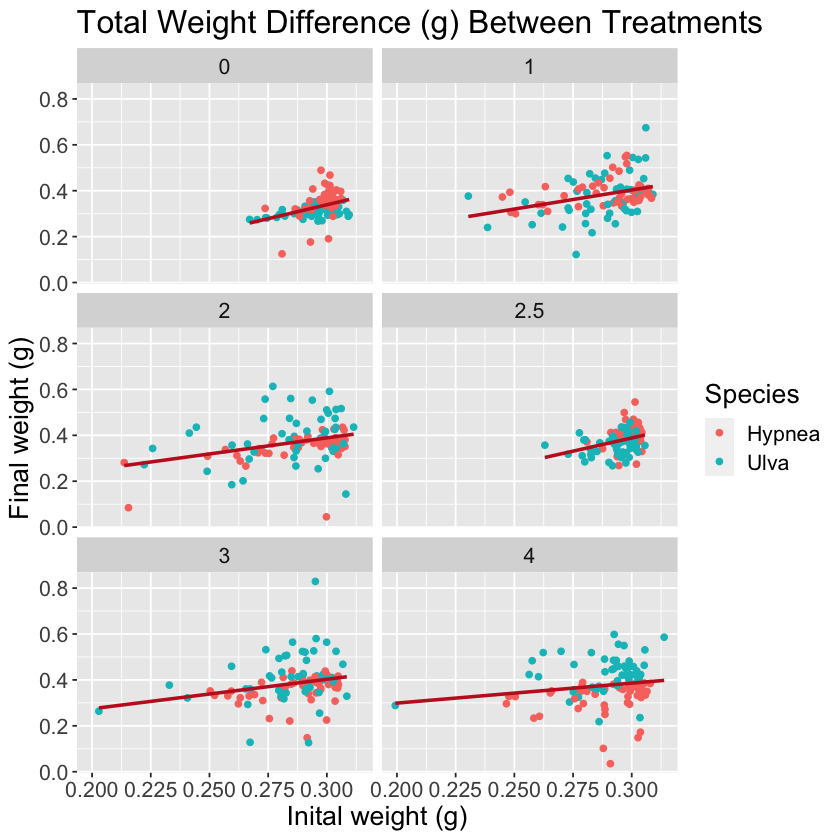

In [180]:
fixt_sp <- t_sp +
    theme(text = element_text(size = 16))
fixt_sp

## Make a grouped barchart

#### Subset each treatment

In [181]:
t0sub <- subset(growthdata, Treatment==0)
t1sub <- subset(growthdata, Treatment==1)
t2sub <- subset(growthdata, Treatment==2)
t3sub <- subset(growthdata, Treatment==3)
t4sub <- subset(growthdata, Treatment==4)
t2_5sub <- subset(growthdata, Treatment==2.5)

#### Calculate mean from each treatment by species

In [182]:
t0avg <- aggregate(t0sub$'Percent Growth (%)', list(t0sub$Species), FUN=mean)

In [183]:
t1avg <- aggregate(t1sub$'Percent Growth (%)', list(t1sub$Species), FUN=mean)

In [184]:
t2avg <- aggregate(t2sub$'Percent Growth (%)', list(t2sub$Species), FUN=mean)

In [185]:
t3avg <- aggregate(t3sub$'Percent Growth (%)', list(t3sub$Species), FUN=mean)

In [186]:
t4avg <- aggregate(t4sub$'Percent Growth (%)', list(t4sub$Species), FUN=mean)

In [187]:
t2_5avg <- aggregate(t2_5sub$'Percent Growth (%)', list(t2_5sub$Species), FUN=mean)

#### Combine all percent growth averages into new table

In [188]:
avg_spgrowth <- rbind(t0avg, t1avg, t2avg, t3avg, t4avg, t2_5avg)

In [189]:
head(avg_spgrowth)

,Group.1,x
,<fct>,<dbl>
1,Hypnea,18.236652
2,Ulva,4.457724
3,Hypnea,35.341096
4,Ulva,30.580696
5,Hypnea,19.931004
6,Ulva,38.100976


#### Assign each treatment, respectively

In [190]:
avg_spgrowth$Treatment <- c(0, 0, 1, 1, 2, 2, 3, 3,
                            4, 4, 2.5, 2.5)

### Create barchart for average percent growth (%) by species across 6 treatments 

In [191]:
perc_growthBC <- ggplot(avg_spgrowth, aes(x=Group.1, y=x)) + 
    geom_bar(position="dodge", stat="identity",aes(fill=factor(Treatment))) +
           labs(
        title = "Average Algal Percent Growth Across Treatments",
        x = "Species",
        y = "Percent Growth (%)",
        fill = "Treatment")  

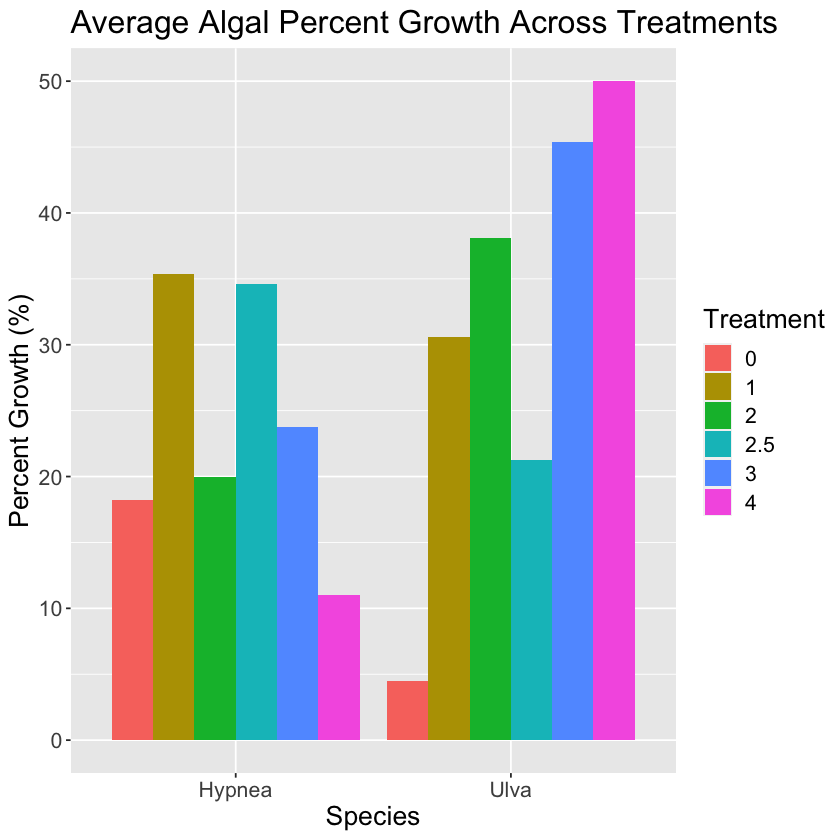

In [192]:
fixperc_growthBC <- perc_growthBC +
    theme(text = element_text(size = 16))
fixperc_growthBC

### Make a box and whisker plot for percent growth for for each treatment

#### Subset each treatment

In [193]:
b_w_pg <- ggplot(growthdata, aes(x=Species, y=`Percent Growth (%)`, fill=Species)) +
    geom_boxplot(outlier.colour="black", outlier.shape=16, outlier.size=2) +
    facet_wrap( ~ Treatment, ncol=2) +
    labs(
        title = "Growth Rate (%) for all Treatments",
        x = "Species",
        y = "Growth Rate (%)"
      )

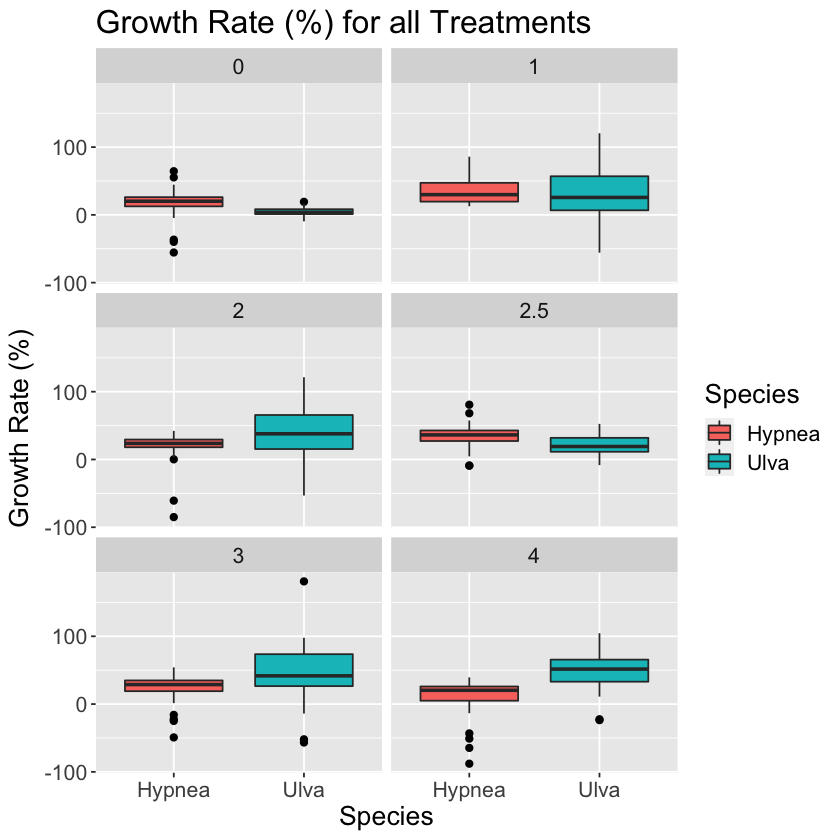

In [194]:
fixb_w_pg <- b_w_pg +
    theme(text = element_text(size = 16))
fixb_w_pg

## Statistical Analysis

#### Subset dataset by species of algae

In [195]:
ulv_sub <- subset(growthdata, Species=="Ulva")
hyp_sub <- subset(growthdata, Species=="Hypnea")

#### Check for equal variances using Bartlettʻs test

In [196]:
bartlett.test(`Percent Growth (%)` ~ Treatment, data = ulv_sub)


	Bartlett test of homogeneity of variances

data:  Percent Growth (%) by Treatment
Bartlett's K-squared = 133.97, df = 5, p-value < 2.2e-16


#### P-value is significant (<0.05), therefore we reject the null hypothesis and can run next test

## Run ANOVA

## Do a Tukey (Post hoc) to see if the means of percent growth differ significantly between treatments

what is diff on tukey; for every % growth change; the difference is 26 for 1-0 treatments; 
pairwise comparison across treatments 

In [197]:
ulv_model <- aov(`Percent Growth (%)` ~ Treatment, data = ulv_sub)
summary(ulv_model)
TukeyHSD(ulv_model, conf.level = 0.95)

             Df Sum Sq Mean Sq F value   Pr(>F)    
Treatment     5  67979   13596   16.62 2.18e-14 ***
Residuals   282 230632     818                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = `Percent Growth (%)` ~ Treatment, data = ulv_sub)

$Treatment
            diff          lwr        upr     p adj
1-0    26.122972   9.37261893 42.8733253 0.0001604
2-0    33.643252  16.89289871 50.3936051 0.0000003
2.5-0  16.784450   0.03409646 33.5348029 0.0492015
3-0    40.933674  24.18332092 57.6840273 0.0000000
4-0    45.547350  28.79699639 62.2977028 0.0000000
2-1     7.520280  -9.23007342 24.2706330 0.7913305
2.5-1  -9.338522 -26.08887567  7.4118307 0.5994151
3-1    14.810702  -1.93965121 31.5610552 0.1169641
4-1    19.424377   2.67402426 36.1747307 0.0126119
2.5-2 -16.858802 -33.60915546 -0.1084491 0.0474976
3-2     7.290422  -9.45993099 24.0407754 0.8122045
4-2    11.904098  -4.84625553 28.6544509 0.3228451
3-2.5  24.149224   7.39887126 40.8995777 0.0006575
4-2.5  28.762900  12.01254673 45.5132531 0.0000209
4-3     4.613675 -12.13667774 21.3640287 0.9690093


In [198]:
hyp_model <- aov(`Percent Growth (%)` ~ Treatment, data = hyp_sub)
summary(hyp_model)
TukeyHSD(hyp_model, conf.level = 0.95)

             Df Sum Sq Mean Sq F value   Pr(>F)    
Treatment     5  22027    4405   10.24 4.99e-09 ***
Residuals   282 121371     430                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = `Percent Growth (%)` ~ Treatment, data = hyp_sub)

$Treatment
             diff        lwr         upr     p adj
1-0    17.1044436   4.953183  29.2557042 0.0009707
2-0     1.6943513 -10.456909  13.8456119 0.9986703
2.5-0  16.3821049   4.230844  28.5333655 0.0018756
3-0     5.5275305  -6.623730  17.6787912 0.7820003
4-0    -7.1934107 -19.344671   4.9578500 0.5338029
2-1   -15.4100923 -27.561353  -3.2588316 0.0043598
2.5-1  -0.7223387 -12.873599  11.4289220 0.9999798
3-1   -11.5769131 -23.728174   0.5743476 0.0718624
4-1   -24.2978542 -36.449115 -12.1465935 0.0000004
2.5-2  14.6877536   2.536493  26.8390143 0.0078948
3-2     3.8331792  -8.318081  15.9844399 0.9449744
4-2    -8.8877619 -21.039023   3.2634988 0.2908854
3-2.5 -10.8545744 -23.005835   1.2966863 0.1099460
4-2.5 -23.5755155 -35.726776 -11.4242548 0.0000009
4-3   -12.7209412 -24.872202  -0.5696805 0.0341718


#### Plot Tukey to visualize confidence intervals

#### Ulva Tukey plot

NULL

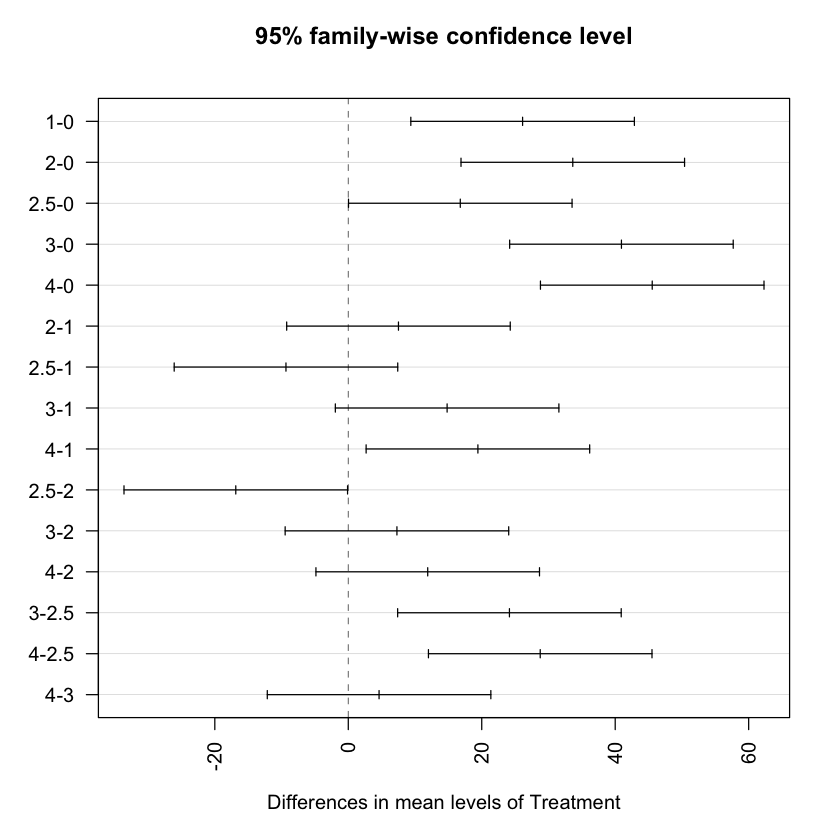

In [199]:
ulva_tukey <- plot(TukeyHSD(ulv_model, conf.level=.95), las = 2)
ulva_tukey

#### Hypnea Tukey plot

NULL

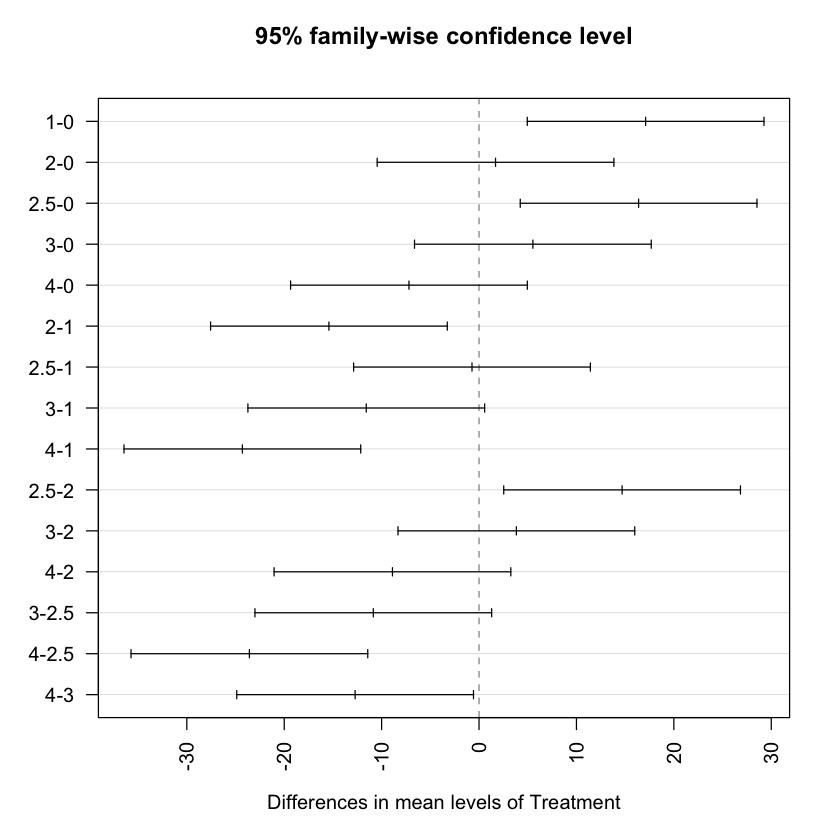

In [200]:
hyp_tukey <- plot(TukeyHSD(hyp_model, conf.level=.95), las = 2)
hyp_tukey

## Parallel Slopes Regression Model 

In [201]:
lm_ulv_pg = lm(`Percent Growth (%)` ~ Treatment + 0, ulv_sub)
lm_hyp_pg = lm(`Percent Growth (%)` ~ Treatment + 0, hyp_sub)

#### Summary for Ulva

In [202]:
summary(lm_ulv_pg)


Call:
lm(formula = `Percent Growth (%)` ~ Treatment + 0, data = ulv_sub)

Residuals:
     Min       1Q   Median       3Q      Max 
-102.099  -14.198   -0.816   13.941  135.632 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
Treatment0      4.458      4.128   1.080    0.281    
Treatment1     30.581      4.128   7.409 1.49e-12 ***
Treatment2     38.101      4.128   9.230  < 2e-16 ***
Treatment2.5   21.242      4.128   5.146 4.99e-07 ***
Treatment3     45.391      4.128  10.997  < 2e-16 ***
Treatment4     50.005      4.128  12.114  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 28.6 on 282 degrees of freedom
Multiple R-squared:  0.6069,	Adjusted R-squared:  0.5986 
F-statistic: 72.57 on 6 and 282 DF,  p-value: < 2.2e-16


#### Summary for Hypnea

In [203]:
summary(lm_hyp_pg)


Call:
lm(formula = `Percent Growth (%)` ~ Treatment + 0, data = hyp_sub)

Residuals:
     Min       1Q   Median       3Q      Max 
-104.948   -7.598    2.619   11.669   50.560 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
Treatment0     18.237      2.994   6.090 3.68e-09 ***
Treatment1     35.341      2.994  11.802  < 2e-16 ***
Treatment2     19.931      2.994   6.656 1.46e-10 ***
Treatment2.5   34.619      2.994  11.561  < 2e-16 ***
Treatment3     23.764      2.994   7.936 4.95e-14 ***
Treatment4     11.043      2.994   3.688 0.000271 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.75 on 282 degrees of freedom
Multiple R-squared:  0.6045,	Adjusted R-squared:  0.596 
F-statistic: 71.82 on 6 and 282 DF,  p-value: < 2.2e-16


#### Box and Whisker Plot for Ulva

In [204]:
bw_ulva <- ggplot(ulv_sub, aes(Treatment, `Percent Growth (%)`)) + 
  geom_boxplot() + 
  stat_summary(fun = mean)

Warning message:
“Removed 6 rows containing missing values (geom_segment).”


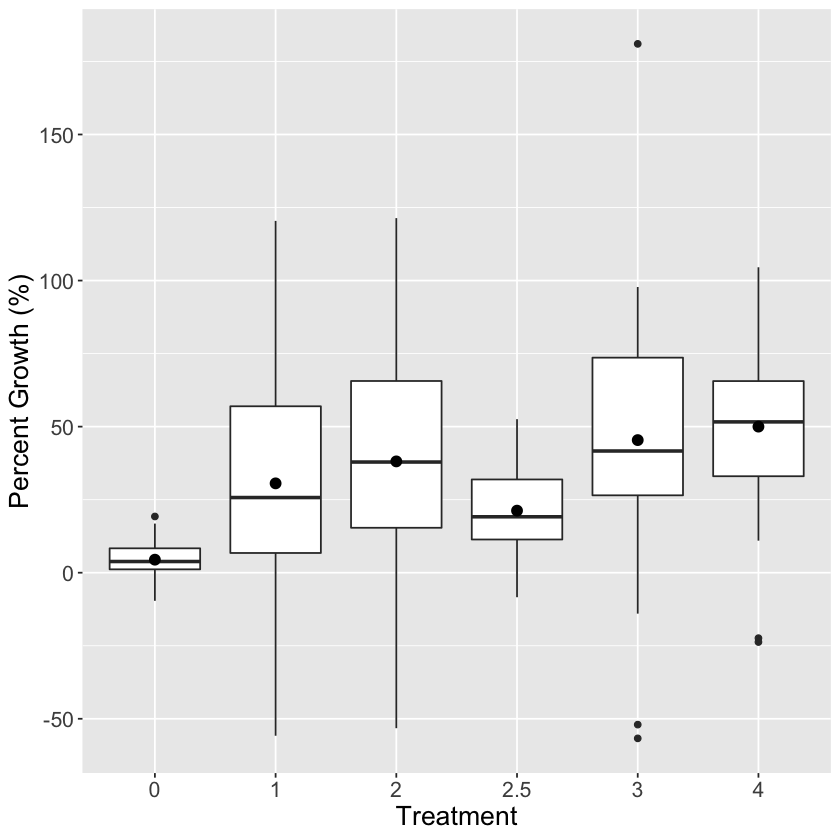

In [205]:
fixbw_ulva <- bw_ulva +
    theme(text = element_text(size = 16))
fixbw_ulva

#### Box and Whisker for Hypnea

In [206]:
bw_hyp <- ggplot(hyp_sub, aes(Treatment, `Percent Growth (%)`)) + 
  geom_boxplot() + 
  stat_summary(fun = mean)

Warning message:
“Removed 6 rows containing missing values (geom_segment).”


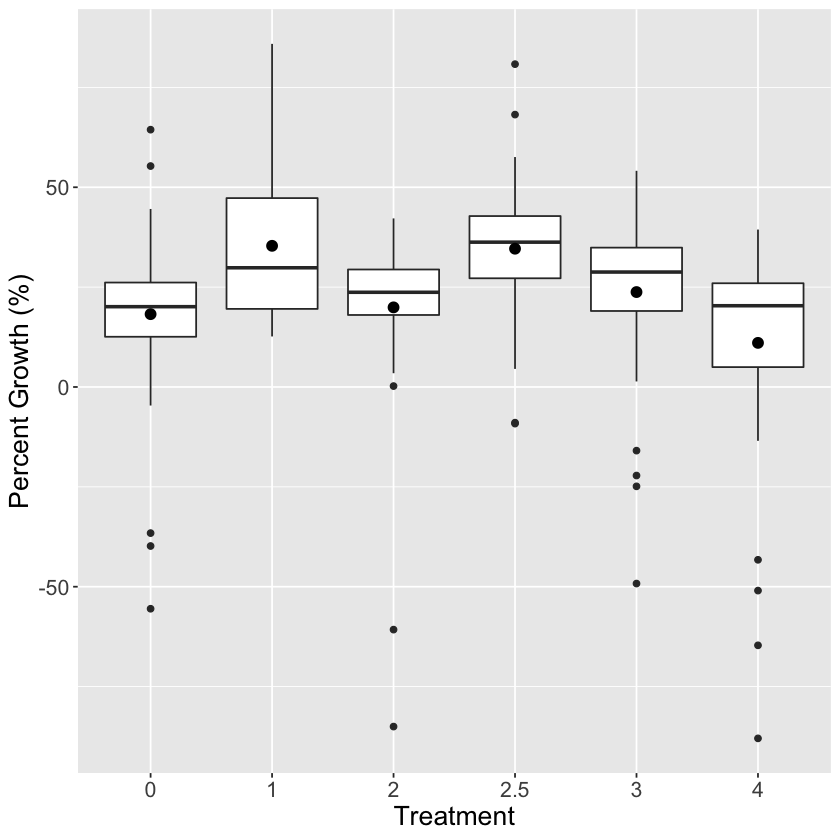

In [207]:
fixbw_hyp <- bw_hyp +
    theme(text = element_text(size = 16))
fixbw_hyp

## Principal Component Analysis (PCA)

#### Use sapply to make ulv_sub numeric

In [208]:
ulv_sub_new <- ulv_sub[sapply(ulv_sub, is.numeric)]

#### Use function prcomp() to calculate the principal components of the ulv_sub
#### Specify scale to = TRUE in order for each of the variables to have a mean of 0 and a standard deviation of 1 before calculating the principal components

In [209]:
ulv_PCA <- prcomp(ulv_sub_new, scale = TRUE)

In [210]:
ulv_PCA$rotation <- -1*ulv_PCA$rotation

In [211]:
ulv_PCA

Standard deviations (1, .., p=4):
[1] 1.722632e+00 1.015220e+00 4.322060e-02 2.924626e-16

Rotation (n x k) = (4 x 4):
                               PC1         PC2        PC3           PC4
Initial weight (g)     -0.03333635 -0.98336870 -0.1246490  1.278175e-01
Final weight (g)       -0.57595116 -0.12202994  0.3916720 -7.070941e-01
Weight Differences (g) -0.57944953  0.05665954  0.4211262  6.954716e-01
Percent Growth (%)     -0.57567977  0.12200162 -0.8085224  9.436896e-16

In [212]:
ulv_PCA$x <- -1*ulv_PCA$x

In [213]:
head(ulv_PCA$x)

PC1,PC2,PC3,PC4
2.3757468,0.9820545,0.07625234,-4.951454e-16
3.3531161,1.5934846,0.16660131,-9.927374e-16
4.5025969,1.0895162,0.16523054,-1.092197e-15
2.9683730,0.0393500,0.01523076,-6.772983e-16
2.0593015,2.8848952,0.15776094,-5.501943e-16
-0.7454223,-1.3429695,0.01035555,4.330761e-16


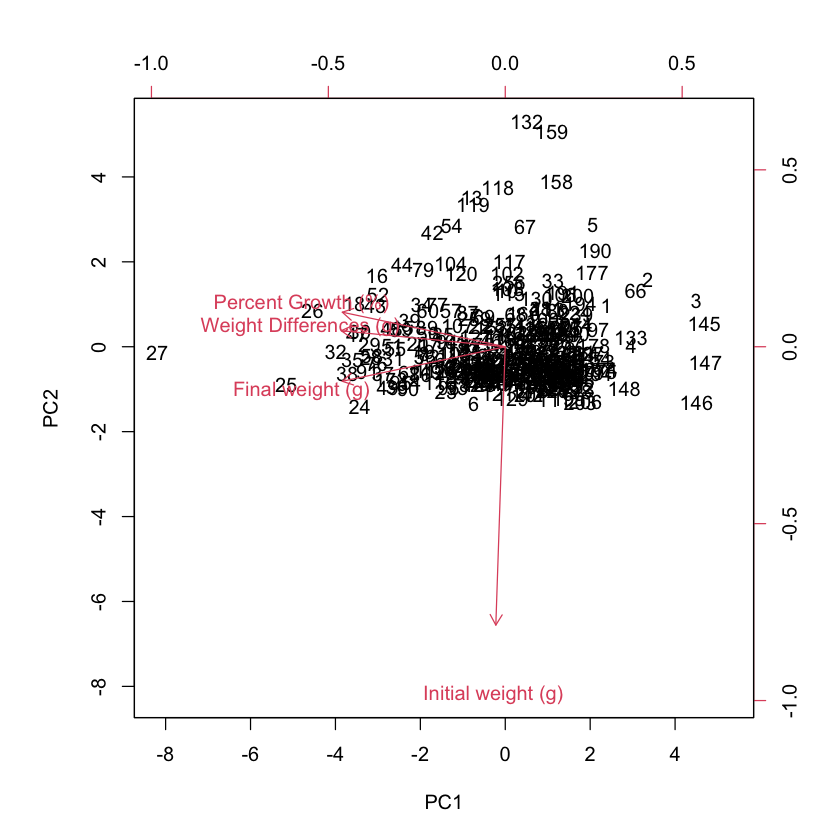

In [214]:
biplot(ulv_PCA, scale = 0)

In [215]:
head(ulv_sub[order(-ulv_sub$`Percent Growth (%)`),])

Species,Treatment,Temperature (C),Initial weight (g),Final weight (g),Lunar phase,Weight Differences (g),Percent Growth (%)
<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
Ulva,3,20,0.2951,0.8293,IV,0.5342,181.02338
Ulva,2,20,0.2770,0.6132,IV,0.3362,121.37184
Ulva,1,20,0.3060,0.6745,IV,0.3685,120.42484
Ulva,4,20,0.2925,0.5983,IV,0.3058,104.54701
Ulva,2,20,0.2737,0.5577,IV,0.2840,103.76324
Ulva,4,27,0.2623,0.5191,IV,0.2568,97.90316


#### Calculate total variance explained by each principal component

#### Each of the numbers below shows the percentage of variance each principal component explains in the data set
#### PC 1 and 2 explain the most variance 

In [216]:
ulv_PCA$sdev^2/sum(ulv_PCA$sdev^2)

[1] 7.418653e-01 2.576677e-01 4.670051e-04 2.138359e-32

#### Make a scree plot to display the total variance explained by each principal component

In [217]:
var_explained = ulv_PCA$sdev^2/sum(ulv_PCA$sdev^2)

In [218]:
screeplot <- qplot(c(1:4), var_explained) +
    geom_line() +
    xlab("Principal Component") +
    ylab("Variance Explained") +
    ggtitle("Scree Plot") +
    ylim(0,1)

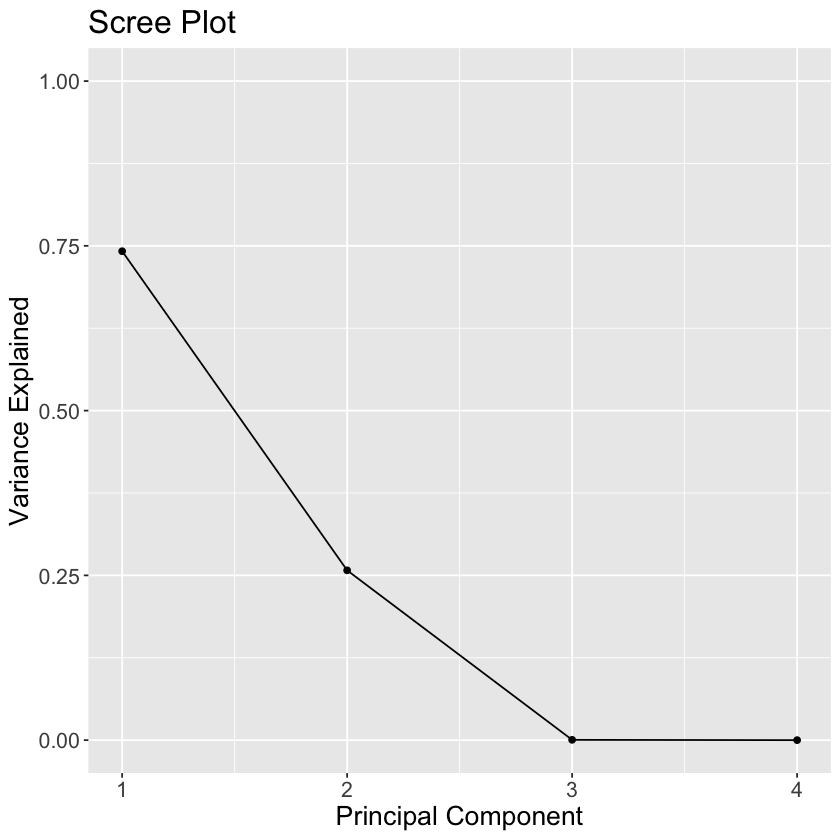

In [219]:
fix_screeplot <- screeplot +
    theme(text = element_text(size = 16))
fix_screeplot